In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
from datetime import datetime
import os
import squarify
import matplotlib.font_manager as fm

# Load Datasets

In [2]:
customer = pd.read_csv('customers.csv')
product = pd.read_csv('products.csv')
store = pd.read_csv('stores.csv')
trans = pd.read_csv('transactions.csv')
employees = pd.read_csv('employees.csv')

In [3]:
customer.head()

,Customer ID,Name,Email,Telephone,City,Country,Gender,Date Of Birth,Job Title
0,1,Tyler Garcia,tyler.garcia@fake_gmail.com,922.970.2265x47563,New York,United States,M,2003-07-15,NaN
1,2,Joshua Miller,joshua.miller@fake_gmail.com,+1-958-729-6169,New York,United States,M,2000-06-16,Records manager
2,3,Alison Marshall DDS,alison.marshall.dds@fake_hotmail.com,+1-645-567-0876x5409,New York,United States,F,2003-07-22,NaN
3,4,Jeffery Acosta,jeffery.acosta@fake_yahoo.com,212.336.0912x84994,New York,United States,M,1996-11-12,Proofreader
4,5,Ashley Sanders,ashley.sanders@fake_hotmail.com,7814535781,New York,United States,F,1998-02-10,Exercise physiologist


In [4]:
employees.head()

,Employee ID,Store ID,Name,Position
0,1,1,Stephen Johnson,Store Manager
1,2,1,Rebecca Myers,Assistant Manager
2,3,1,Katherine Buchanan,Cashier
3,4,1,Jessica Hicks,Stock Clerk
4,5,1,Ryan Gross,Sales Associate


In [5]:
store.head()

,Store ID,Country,City,Store Name,Number of Employees,ZIP Code,Latitude,Longitude
0,1,United States,New York,Store New York,10,10001,40.7128,-74.0060
1,2,United States,Los Angeles,Store Los Angeles,8,90001,34.0522,-118.2437
2,3,United States,Chicago,Store Chicago,9,60601,41.8781,-87.6298
3,4,United States,Houston,Store Houston,10,77001,29.7604,-95.3698
4,5,United States,Phoenix,Store Phoenix,9,85001,33.4484,-112.0740


In [6]:
trans.head()

,Invoice ID,Line,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Date,Discount,Line Total,Store ID,Employee ID,Currency,Currency Symbol,SKU,Transaction Type,Payment Method,Invoice Total
0,INV-US-001-03558761,1,47162,485,M,NaN,80.5,1,2023-01-01 15:42:00,0.0,80.5,1,7,USD,$,MASU485-M-,Sale,Cash,126.7
1,INV-US-001-03558761,2,47162,2779,G,NaN,31.5,1,2023-01-01 15:42:00,0.4,18.9,1,7,USD,$,CHCO2779-G-,Sale,Cash,126.7
2,INV-US-001-03558761,3,47162,64,M,NEUTRAL,45.5,1,2023-01-01 15:42:00,0.4,27.3,1,7,USD,$,MACO64-M-NEUTRAL,Sale,Cash,126.7
3,INV-US-001-03558762,1,10142,131,M,BLUE,70.0,1,2023-01-01 20:04:00,0.4,42.0,1,6,USD,$,FECO131-M-BLUE,Sale,Cash,77.0
4,INV-US-001-03558762,2,10142,716,L,WHITE,26.0,1,2023-01-01 20:04:00,0.0,26.0,1,6,USD,$,MAT-716-L-WHITE,Sale,Cash,77.0


In [7]:
product.head(2)

,Product ID,Category,Sub Category,Description PT,Description DE,Description FR,Description ES,Description EN,Description ZH,Color,Sizes,Production Cost
0,1,Feminine,Coats and Blazers,Esportivo Veludo Verde Com Botões,Sport Samt Sport Mit Knöpfen,Sports Velvet Sports Avec Des Boutons,Deportes De Terciopelo Con Botones,Sports Velvet Sports With Buttons,运动天鹅绒运动与按钮,NaN,S|M|L|XL,10.73
1,2,Feminine,Sweaters and Knitwear,Luxuoso Denim Rosa Com Botões,Luxuriöser Rosa Jeans Mit Knöpfen,Léchard De Denim Rose Avec Boutons,Denim Rosa Lujoso Con Botones,Luxurious Pink Denim With Buttons,豪华的粉红色牛仔布和纽扣,PINK,S|M|L|XL,19.55


In [8]:
print(trans.dtypes)

Invoice ID           object
Line                  int64
Customer ID           int64
Product ID            int64
Size                 object
Color                object
Unit Price          float64
Quantity              int64
Date                 object
Discount            float64
Line Total          float64
Store ID              int64
Employee ID           int64
Currency             object
Currency Symbol      object
SKU                  object
Transaction Type     object
Payment Method       object
Invoice Total       float64
dtype: object


# Convert Date col Dtypes object to Datetime

In [9]:
trans['Date'] = pd.to_datetime(trans['Date'])
trans['Month'] = trans['Date'].dt.to_period('M').astype(str)

# Data Preprocessing

In [10]:
sale_store = trans.merge(store[['Store ID','Country','City','Store Name']], on='Store ID',how='left')

In [11]:
sales = sale_store.merge(product[['Product ID','Description EN']],on = 'Product ID' , how = 'left')
returns = sales[(sales['Transaction Type'] == 'Return')]
sales =  sales[(sales['Transaction Type'] == 'Sale')]
sales.rename(columns={'Description EN':'Product Name'}, inplace=True)
print('Sales', len(sales))
print('Return',len(returns))

Sales 6077200
Return 339627


In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6077200 entries, 0 to 6416826
Data columns (total 24 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Invoice ID        object        
 1   Line              int64         
 2   Customer ID       int64         
 3   Product ID        int64         
 4   Size              object        
 5   Color             object        
 6   Unit Price        float64       
 7   Quantity          int64         
 8   Date              datetime64[ns]
 9   Discount          float64       
 10  Line Total        float64       
 11  Store ID          int64         
 12  Employee ID       int64         
 13  Currency          object        
 14  Currency Symbol   object        
 15  SKU               object        
 16  Transaction Type  object        
 17  Payment Method    object        
 18  Invoice Total     float64       
 19  Month             object        
 20  Country           object        
 21  City         

In [13]:
sales.isnull().sum()

Invoice ID                0
Line                      0
Customer ID               0
Product ID                0
Size                 391102
Color               4120186
Unit Price                0
Quantity                  0
Date                      0
Discount                  0
Line Total                0
Store ID                  0
Employee ID               0
Currency                  0
Currency Symbol           0
SKU                       0
Transaction Type          0
Payment Method            0
Invoice Total             0
Month                     0
Country                   0
City                      0
Store Name                0
Product Name              0
dtype: int64

In [14]:
Total_sales =sales.copy()

In [15]:
sales.shape

(6077200, 24)

In [16]:
Total_sales.shape

(6077200, 24)

In [17]:
Total_sales.drop(columns = ['Size','Color'], inplace = True)

In [18]:
Total_sales.isnull().sum()

Invoice ID          0
Line                0
Customer ID         0
Product ID          0
Unit Price          0
Quantity            0
Date                0
Discount            0
Line Total          0
Store ID            0
Employee ID         0
Currency            0
Currency Symbol     0
SKU                 0
Transaction Type    0
Payment Method      0
Invoice Total       0
Month               0
Country             0
City                0
Store Name          0
Product Name        0
dtype: int64

In [20]:
Total_sales.describe()

,Line,Customer ID,Product ID,Unit Price,Quantity,Date,Discount,Line Total,Store ID,Employee ID,Invoice Total
count,6.077200e+06,6.077200e+06,6.077200e+06,6.077200e+06,6.077200e+06,6077200,6.077200e+06,6.077200e+06,6.077200e+06,6.077200e+06,6.077200e+06
mean,1.573296e+00,7.325784e+05,9.264293e+03,1.324817e+02,1.100198e+00,2024-03-12 18:10:07.603458048,1.257114e-01,1.277003e+02,1.345908e+01,1.562248e+02,2.743566e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2023-01-01 08:00:00,0.000000e+00,1.400000e+00,1.000000e+00,5.000000e+00,1.400000e+00
25%,1.000000e+00,2.944900e+05,6.385000e+03,3.250000e+01,1.000000e+00,2023-09-22 14:55:00,0.000000e+00,2.745000e+01,5.000000e+00,5.800000e+01,3.900000e+01
50%,1.000000e+00,6.764450e+05,9.157000e+03,5.100000e+01,1.000000e+00,2024-03-10 19:56:00,0.000000e+00,4.650000e+01,1.000000e+01,1.220000e+02,9.225000e+01
75%,2.000000e+00,1.138781e+06,1.267900e+04,1.165000e+02,1.000000e+00,2024-10-08 15:55:00,2.500000e-01,1.207500e+02,2.200000e+01,2.530000e+02,2.565500e+02
max,7.000000e+00,1.643306e+06,1.794000e+04,1.153500e+03,3.000000e+00,2025-03-18 20:59:00,6.000000e-01,3.460500e+03,3.500000e+01,4.040000e+02,8.977000e+03
std,1.149609e+00,4.874671e+05,3.856444e+03,1.851204e+02,3.962860e-01,NaN,2.024585e-01,2.037154e+02,1.013426e+01,1.171460e+02,5.190895e+02


<Axes: xlabel='Unit Price'>

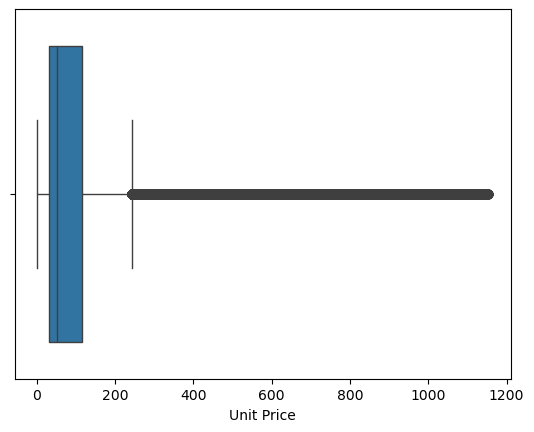

In [21]:
sns.boxplot(x=Total_sales["Unit Price"])

Most unit prices are concentrated between ₹0 and ₹200, showing where the majority of sales occur.

A few outliers extend up to ₹1200, which might indicate special cases or premium products.

In [22]:
def remove_outliers(Total_sales):
    if 'Unit Price' in Total_sales.columns:
        # Calculate IQR for the 'Unit Price' column
        Q1 = Total_sales['Unit Price'].quantile(0.25)
        Q3 = Total_sales['Unit Price'].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        Total_sales = Total_sales[
            (Total_sales['Unit Price'] > lower_bound) &
            (Total_sales['Unit Price'] < upper_bound)
        ]
    else:
        print("Error: 'Unit Price' column not found in the dataset.")
    return Total_sales
Total_sales = remove_outliers(Total_sales)
print(Total_sales.head())


            Invoice ID  Line  Customer ID  Product ID  Unit Price  Quantity  \
0  INV-US-001-03558761     1        47162         485        80.5         1   
1  INV-US-001-03558761     2        47162        2779        31.5         1   
2  INV-US-001-03558761     3        47162          64        45.5         1   
3  INV-US-001-03558762     1        10142         131        70.0         1   
4  INV-US-001-03558762     2        10142         716        26.0         1   

                 Date  Discount  Line Total  Store ID  ...  Currency Symbol  \
0 2023-01-01 15:42:00       0.0        80.5         1  ...                $   
1 2023-01-01 15:42:00       0.4        18.9         1  ...                $   
2 2023-01-01 15:42:00       0.4        27.3         1  ...                $   
3 2023-01-01 20:04:00       0.4        42.0         1  ...                $   
4 2023-01-01 20:04:00       0.0        26.0         1  ...                $   

                SKU Transaction Type Payment Metho

<Axes: xlabel='Unit Price'>

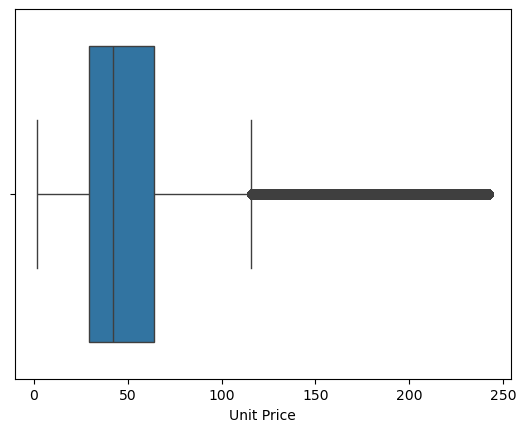

In [23]:
sns.boxplot(x=Total_sales["Unit Price"])

# Total Sales by Country in USD

In [24]:
exchange_rates = {
    'EUR': 1.0886,
    'GBP': 1.3620,
    'CNY': 0.1383,
    'USD': 1.0
}

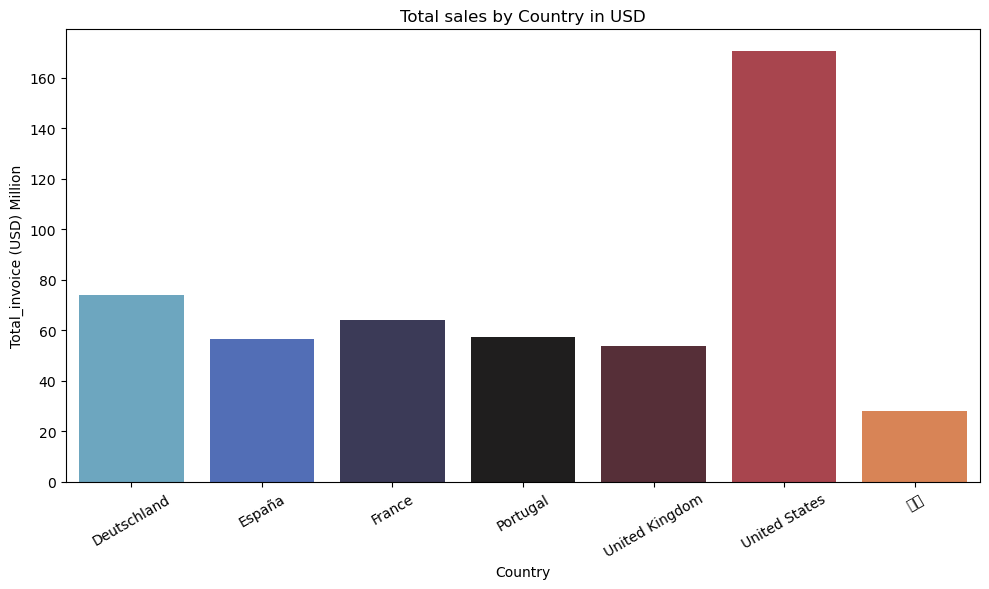

In [25]:
Total_sales['Exchange_Rate'] = Total_sales['Currency'].map(exchange_rates)
Total_sales['Total_invoice_USD'] = Total_sales['Invoice Total']* Total_sales['Exchange_Rate']/1000000
Country_sales = Total_sales.groupby('Country')['Total_invoice_USD'].sum().reset_index()
plt.figure(figsize = (10,6))
sns.barplot(data=Country_sales, x ='Country' , y = 'Total_invoice_USD', palette='icefire')
plt.title('Total sales by Country in USD')
plt.xlabel('Country')
plt.ylabel('Total_invoice (USD) Million')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

The United States leads with the highest sales, close to 160 million USD, significantly outpacing other countries.

Deutschland follows as the second-highest, with around 80 million USD in sales.

Other countries like España, France, Portugal, and the United Kingdom have moderate sales between 40 and 60 million USD.

An china country has the lowest sales, near 20 million USD.

In [26]:
Total_sales_bn = Total_sales[['Invoice Total', 'Exchange_Rate', 'Total_invoice_USD',]].sum()/1000000
print(Total_sales_bn)

Invoice Total        645.263015
Exchange_Rate          5.080554
Total_invoice_USD      0.000505
dtype: float64


In [27]:
Total_sales.nunique()

Invoice ID           3583457
Line                       7
Customer ID          1169916
Product ID             17940
Unit Price               905
Quantity                   3
Date                  597119
Discount                   8
Line Total              3766
Store ID                  35
Employee ID              264
Currency                   4
Currency Symbol            4
SKU                    63751
Transaction Type           1
Payment Method             2
Invoice Total          40304
Month                     27
Country                    7
City                      35
Store Name                35
Product Name            9223
Exchange_Rate              4
Total_invoice_USD      61647
dtype: int64

# QTY By Country

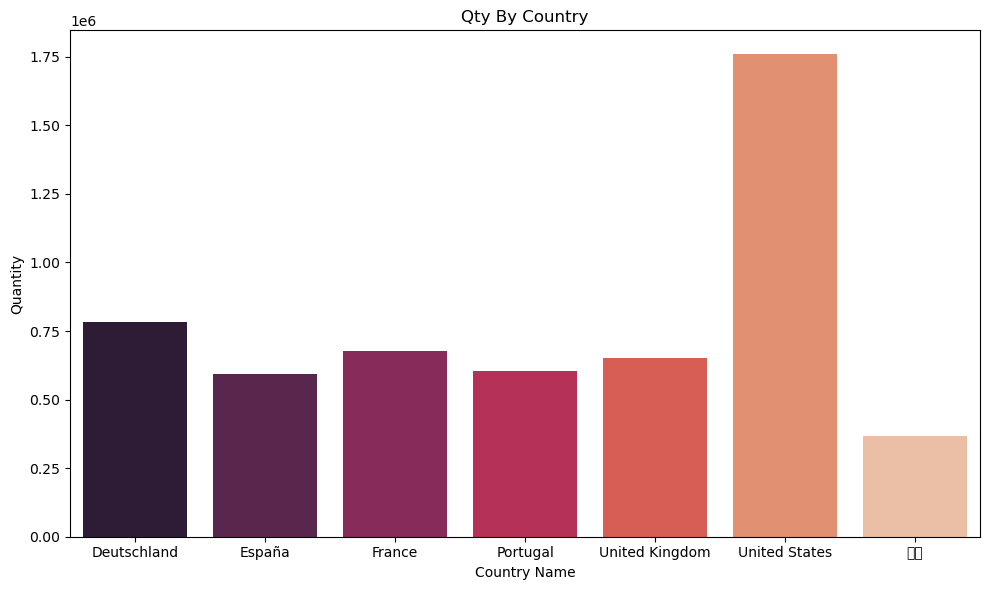

In [28]:
Qty_by_Country = Total_sales.groupby('Country')['Quantity'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data = Qty_by_Country , x = 'Country', y= 'Quantity',palette = 'rocket')
plt.title("Qty By Country")
plt.xlabel("Country Name")
plt.ylabel("Quantity")
plt.tight_layout()
plt.show()

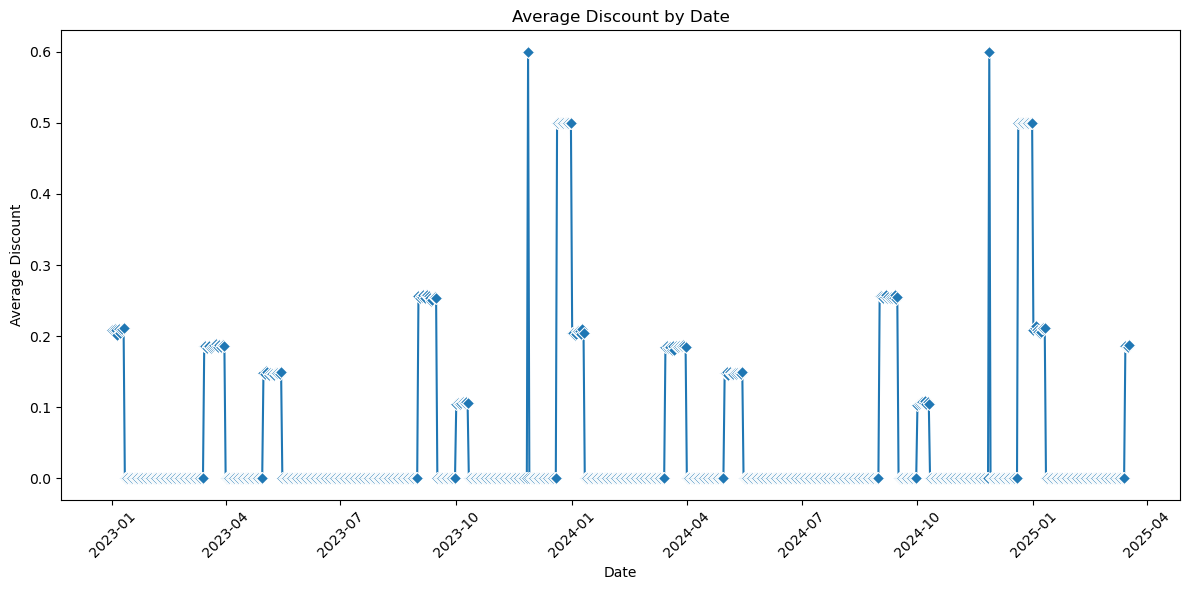

In [29]:
discounts_by_date = Total_sales.groupby(Total_sales['Date'].dt.date)['Discount'].mean().reset_index()
discounts_by_date['Date'] = pd.to_datetime(discounts_by_date['Date'])

plt.figure(figsize=(12,6))
sns.lineplot(data=discounts_by_date, x='Date', y='Discount', marker="D"  ,palette='dark')
plt.title("Average Discount by Date")
plt.xlabel("Date")
plt.ylabel("Average Discount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


__Discount Peaks: Discounts exceeded 50% in January 2024 and January 2025.__

# Sales Quantity BY Months & Country

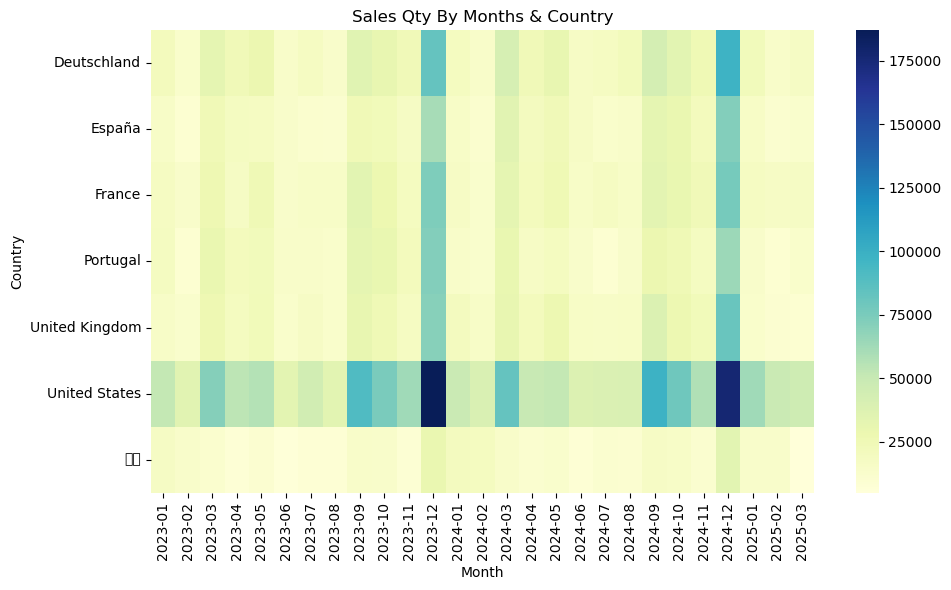

In [30]:
Sales_month =Total_sales.groupby(['Month','Country'])['Quantity'].sum().reset_index()
Sales_Qty_Month = Sales_month.pivot(index='Country' , columns = 'Month',values = 'Quantity')

plt.figure(figsize=(10,6))
sns.heatmap(Sales_Qty_Month ,annot = False ,cmap = 'YlGnBu')
plt.title('Sales Qty By Months & Country')
plt.xlabel('Month')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

__United States dominates sales consistently across months, with peaks in several periods.

Deutschland, France, and España show strong performance but lower sales compared to the U.S.

United Kingdom and Portugal have stable but modest sales levels.

The pattern highlights seasonal peaks and clear dominance of the U.S. market.__

# Revenue By Payment Method

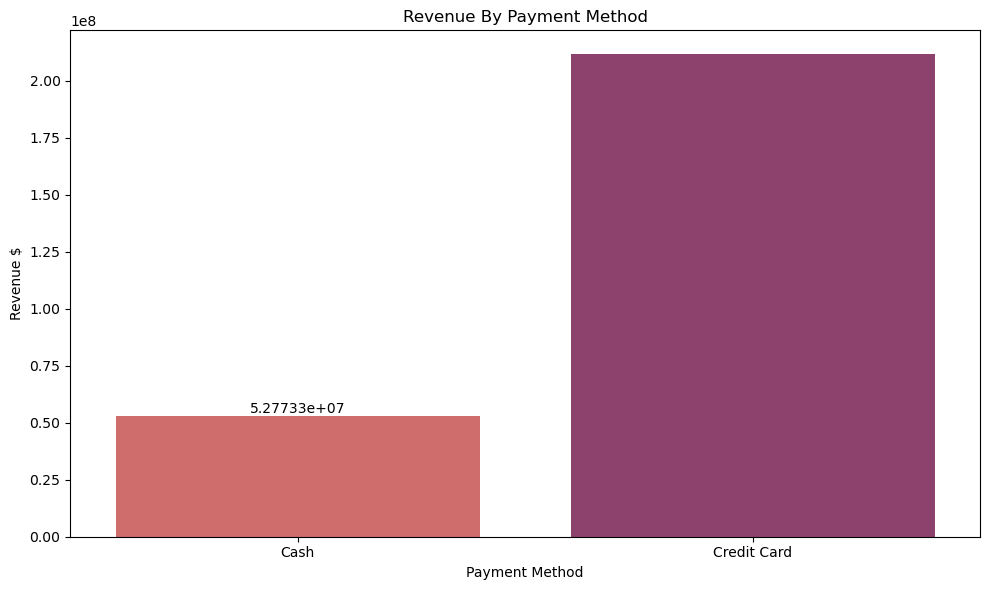

In [31]:
Revenue_by_Month = Total_sales.groupby('Payment Method')['Line Total'].sum().reset_index()

plt.figure(figsize=(10,6))
Bar=sns.barplot(data = Revenue_by_Month , x = 'Payment Method',y = 'Line Total' , palette = 'flare')
Bar.bar_label(Bar.containers[0],fontsize = 10)
plt.title('Revenue By Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Revenue $')
plt.tight_layout()
plt.show()

-The credit card payment method generates significantly higher revenue, close to 200 million dollar  compared to the first  which brings in about   52 million Dollar.

# Top 10 Store VS QTY Sold ( By Country)

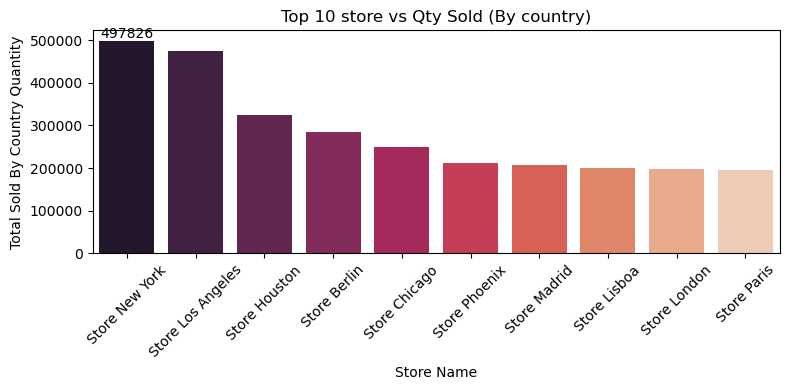

In [62]:
Top_store = Total_sales.groupby('Store Name')['Quantity'].sum().reset_index()
Top_10_store = Top_store.sort_values(by='Quantity', ascending = False ).head(10)

plt.figure(figsize=(8,4))
Barplots = sns.barplot(data = Top_10_store , x ='Store Name',y = 'Quantity',palette = 'rocket', errorbar=None)
Barplots.bar_label(Barplots.containers[0],fontsize=10)
plt.title('Top 10 store vs Qty Sold (By country)')
plt.xlabel('Store Name')
plt.ylabel('Total Sold By Country Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



__Store New York leads the sales race with the highest quantity sold, close to 498,000 units.

Other stores like Los Angeles, Houston, and Berlin perform well but show lower quantities compared to New York.

The chart highlights significant variation in sales quantities across the top 10 stores.__

# Sales Qty in USA by store & Months

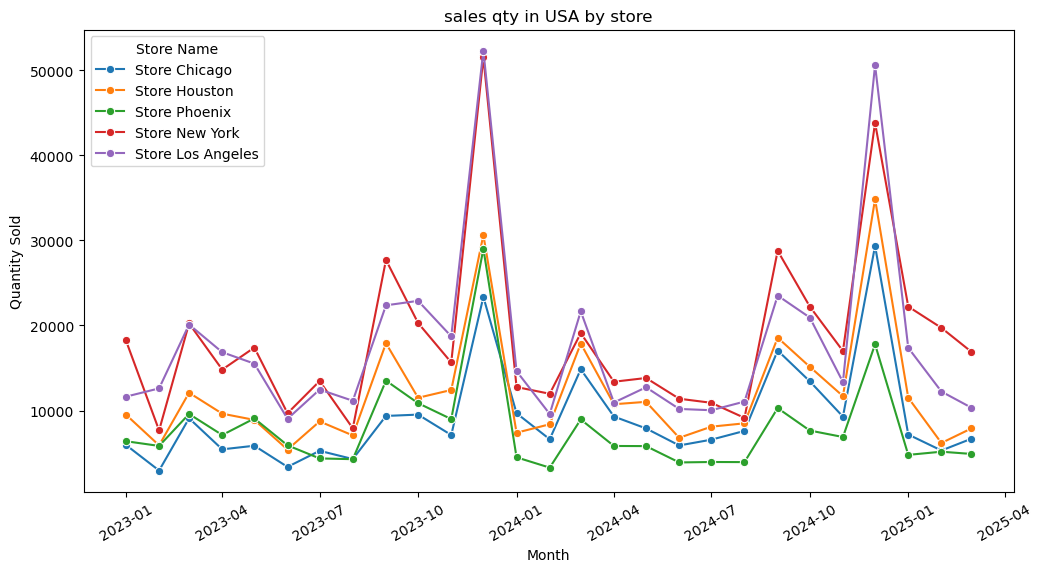

In [33]:
USA_Sales = Total_sales[Total_sales['Country']=='United States']

Sales_USA =USA_Sales.groupby(['Store Name','Month'])['Quantity'].sum().reset_index()

Sales_USA['Month_dt'] = pd.to_datetime(Sales_USA['Month'],format='%Y-%m')

Sales_USA = Sales_USA.sort_values(by='Month_dt')

plt.figure(figsize=(12,6))
sns.lineplot(data =Sales_USA, x='Month_dt', y='Quantity' , hue='Store Name', marker='o')
plt.title('sales qty in USA by store')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation =30)
plt.tight_layout
plt.show()



 # Geographic Sales Comparison

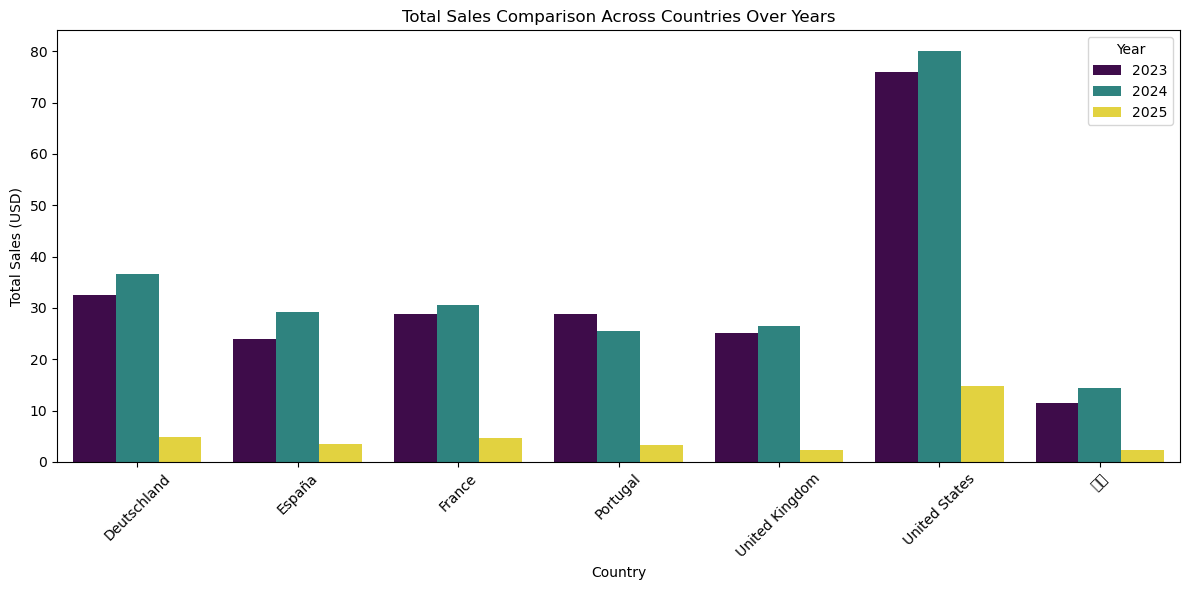

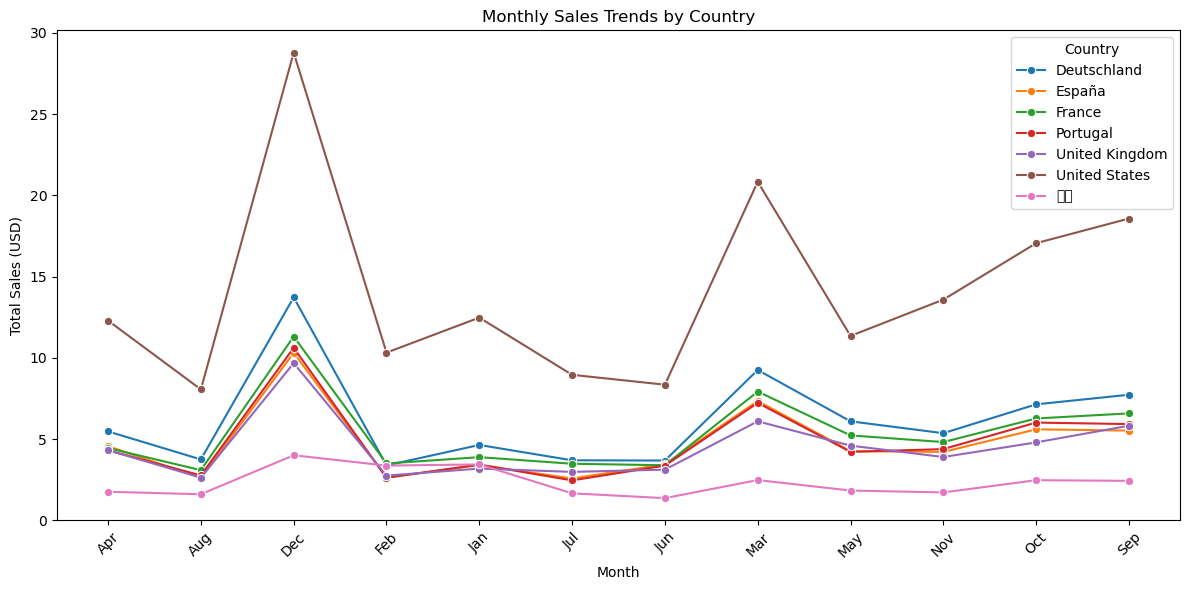

In [34]:

Total_sales['Date'] = pd.to_datetime(Total_sales['Date'])

Total_sales['Year'] = Total_sales['Date'].dt.year
Total_sales['Month'] = Total_sales['Date'].dt.strftime('%b') 


country_sales = Total_sales.groupby(['Country', 'Year'])['Total_invoice_USD'].sum().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(data=country_sales, x='Country', y='Total_invoice_USD', hue='Year', palette='viridis')
plt.title('Total Sales Comparison Across Countries Over Years')
plt.xlabel('Country')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)  
plt.legend(title='Year')
plt.tight_layout()
plt.show()

monthly_sales = Total_sales.groupby(['Country', 'Month'])['Total_invoice_USD'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total_invoice_USD', hue='Country', marker='o', palette='tab10')
plt.title('Monthly Sales Trends by Country')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45) 
plt.legend(title='Country')
plt.tight_layout()
plt.show()



United States leads sales consistently across years, with noticeable peaks during specific months, especially in December.

Other countries show steady trends with smaller variations, indicating stable sales throughout the months.

Clear end-of-year surge across all countries, especially in the United States, which dominates the sales figures.

# Store-wise Sales Analysis

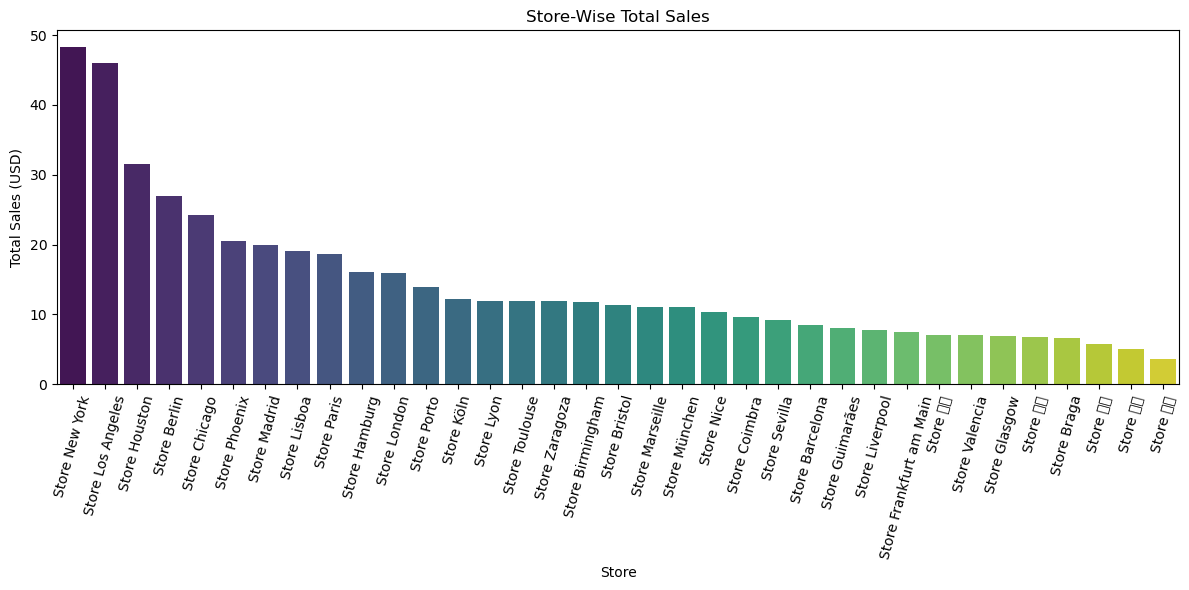

In [35]:

store_sales = Total_sales.groupby('Store Name')['Total_invoice_USD'].sum().reset_index()
store_sales = store_sales.sort_values(by='Total_invoice_USD', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(data=store_sales, x='Store Name', y='Total_invoice_USD', palette='viridis')
plt.title('Store-Wise Total Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=75) 
plt.tight_layout()
plt.show()



# Multi-Currency and Regional Impact Analysis

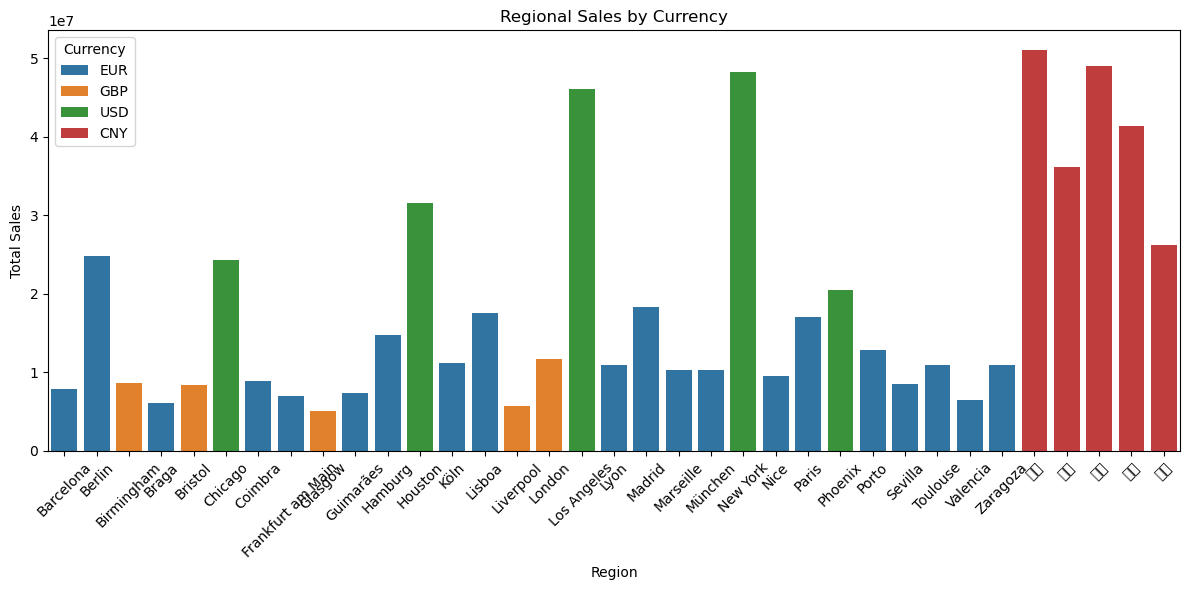

Total Sales in USD by Region:
                 City  Sales_in_USD
0           Barcelona  8.594510e+06
1              Berlin  2.730540e+07
2          Birmingham  1.125865e+07
3               Braga  6.721404e+06
4             Bristol  1.090525e+07
5             Chicago  2.428042e+07
6             Coimbra  9.786827e+06
7   Frankfurt am Main  7.608483e+06
8             Glasgow  6.653178e+06
9           Guimarães  8.108298e+06
10            Hamburg  1.621560e+07
11            Houston  3.153635e+07
12               Köln  1.235083e+07
13             Lisboa  1.925073e+07
14          Liverpool  7.451998e+06
15             London  1.518546e+07
16        Los Angeles  4.606407e+07
17               Lyon  1.207217e+07
18             Madrid  2.009175e+07
19          Marseille  1.124987e+07
20            München  1.124182e+07
21           New York  4.826941e+07
22               Nice  1.047215e+07
23              Paris  1.879052e+07
24            Phoenix  2.052441e+07
25              Porto  1.410053e+0

In [36]:

exchange_rates = {'USD': 1.0, 'EUR': 1.1, 'CNY': 0.15, 'GBP': 1.3}
Total_sales['Sales_in_USD'] = Total_sales['Invoice Total'] * Total_sales['Currency'].map(exchange_rates)

regional_sales = Total_sales.groupby(['City', 'Currency'])['Invoice Total'].sum().reset_index()
regional_sales_usd = Total_sales.groupby('City')['Sales_in_USD'].sum().reset_index()
currency_sales = Total_sales.groupby('Currency')['Invoice Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=regional_sales, x='City', y='Invoice Total', hue='Currency', palette='tab10')
plt.title('Regional Sales by Currency')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Currency')
plt.tight_layout()
plt.show()



print("Total Sales in USD by Region:")
print(regional_sales_usd)




EUR: Strong sales in Berlin, Frankfurt, and Munich.

GBP: Good performance in Birmingham, Bristol, and Liverpool, but slightly lower than EUR.

USD: Key markets include New York, Los Angeles, London, and Chicago.

CNY: Prominent in Zaragoza and other cities

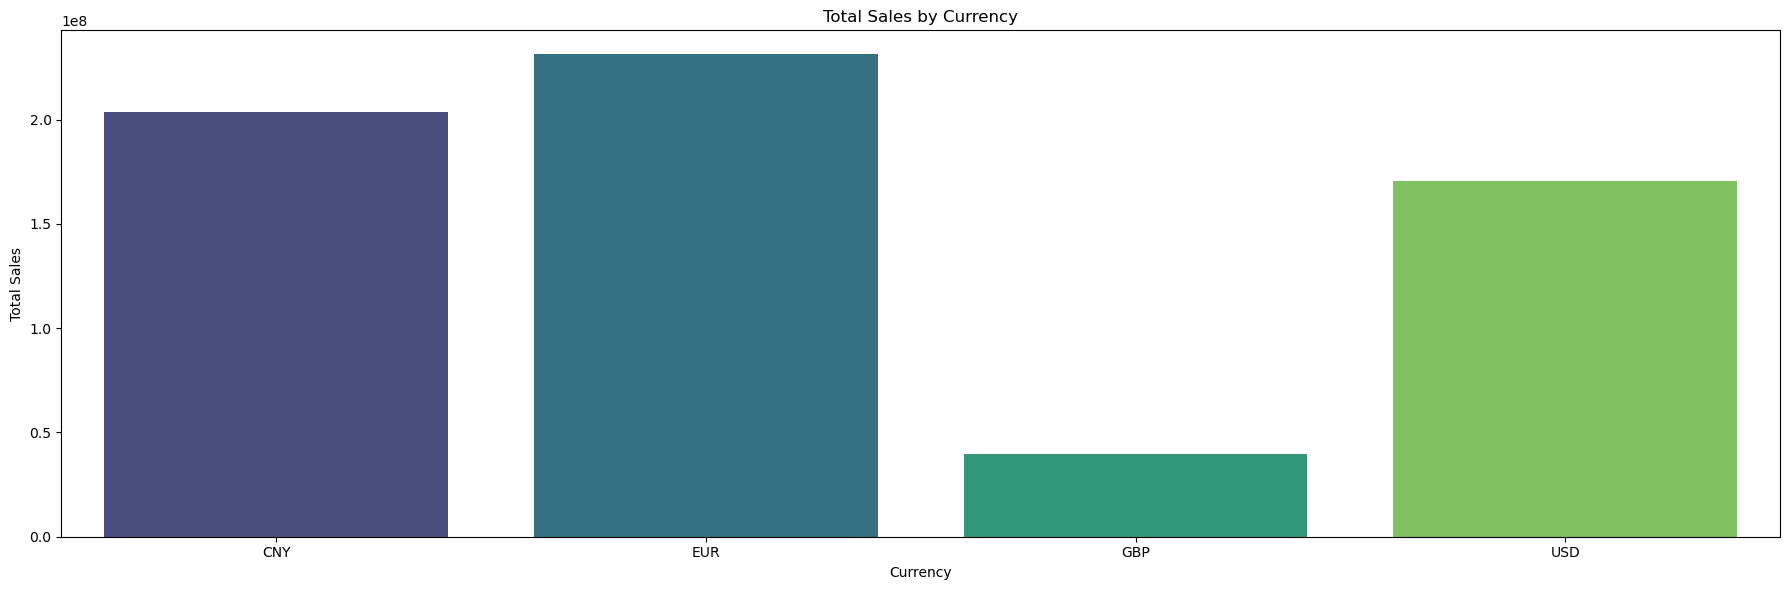


Currency Preferences (Total Sales by Currency):
  Currency  Invoice Total
0      CNY   2.037007e+08
1      EUR   2.313072e+08
2      GBP   3.958042e+07
3      USD   1.706747e+08


In [59]:
plt.figure(figsize=(18, 6))
sns.barplot(data=currency_sales, x='Currency', y='Invoice Total', palette='viridis')
plt.title('Total Sales by Currency')
plt.xlabel('Currency')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


print("\nCurrency Preferences (Total Sales by Currency):")
print(currency_sales)

Top Performers: EUR and CNY surpass ₹200 crores, leading sales.

Moderate Sales: USD contributes around ₹150 crores, showing decent activity.

Lowest Sales: GBP trails at ₹50 crores, reflecting a smaller market.

In [44]:
Total_sales.head()

,Invoice ID,Line,Customer ID,Product ID,Unit Price,Quantity,Date,Discount,Line Total,Store ID,...,City,Store Name,Product Name,Exchange_Rate,Total_invoice_USD,Year,Sales_in_USD,Category,Sizes,Color
0,INV-US-001-03558761,1,47162,485,80.5,1,2023-01-01 15:42:00,0.0,80.5,1,...,New York,Store New York,Men'S Rustic Fabric Blazer With Texture,1.0,0.000127,2023,126.7,Masculine,M|L|XL,NaN
1,INV-US-001-03558761,2,47162,2779,31.5,1,2023-01-01 15:42:00,0.4,18.9,1,...,New York,Store New York,Streetwear Golden Silk,1.0,0.000127,2023,126.7,Children,P|M|G,NaN
2,INV-US-001-03558761,3,47162,64,45.5,1,2023-01-01 15:42:00,0.4,27.3,1,...,New York,Store New York,Luxurious Neutral Suede With Hood,1.0,0.000127,2023,126.7,Masculine,M|L|XL|XXL,NEUTRAL
3,INV-US-001-03558762,1,10142,131,70.0,1,2023-01-01 20:04:00,0.4,42.0,1,...,New York,Store New York,Formal Blue Jeans With Ruffles,1.0,0.000077,2023,77.0,Feminine,S|M|L|XL,BLUE
4,INV-US-001-03558762,2,10142,716,26.0,1,2023-01-01 20:04:00,0.0,26.0,1,...,New York,Store New York,High-Tech Suede White Embroidered,1.0,0.000077,2023,77.0,Masculine,M|L|XL,WHITE


In [40]:
Total_sales = Total_sales.merge(product[['Product ID', 'Category','Sizes','Color']], on='Product ID', how='left')

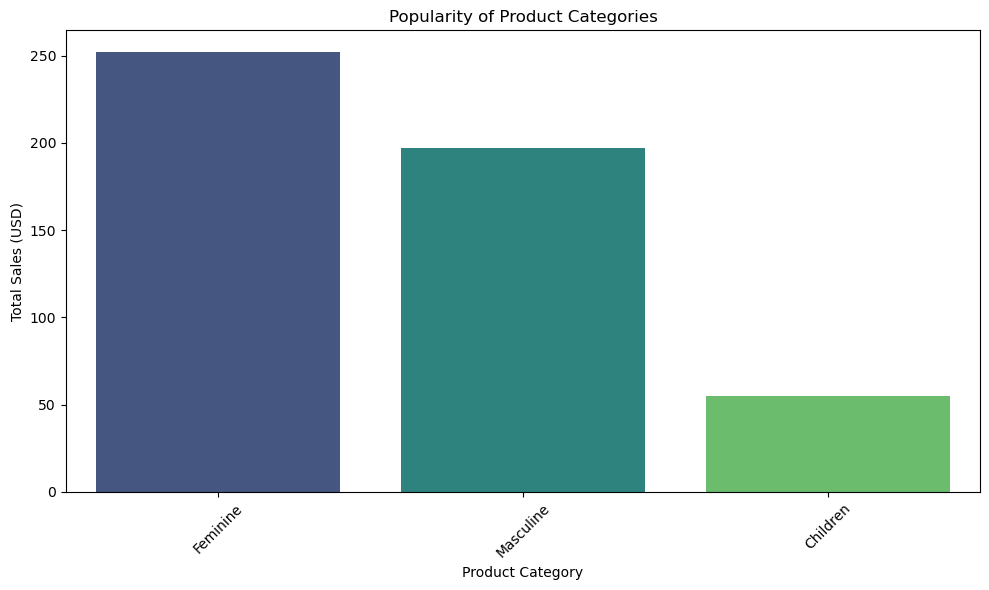

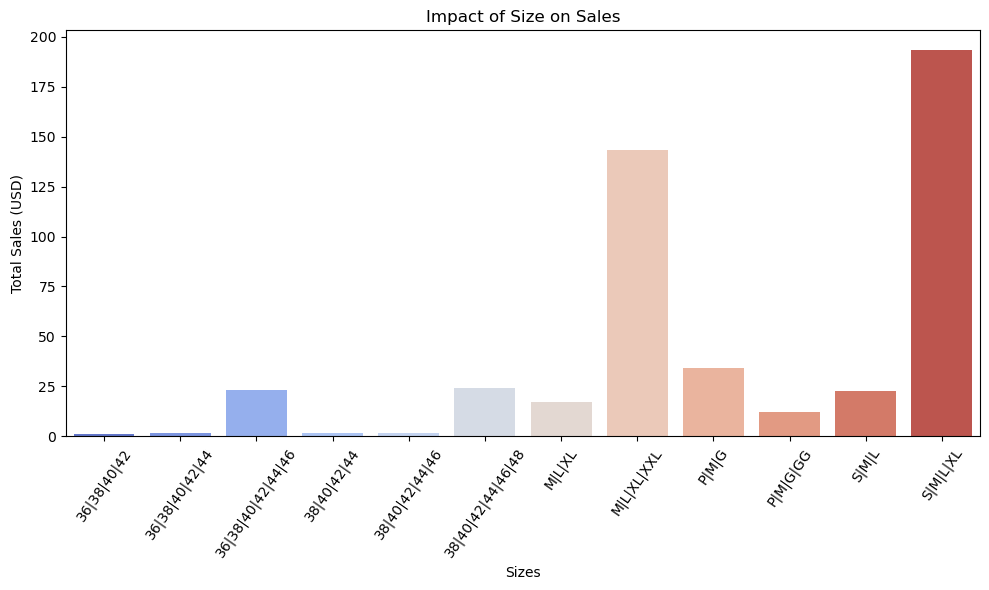

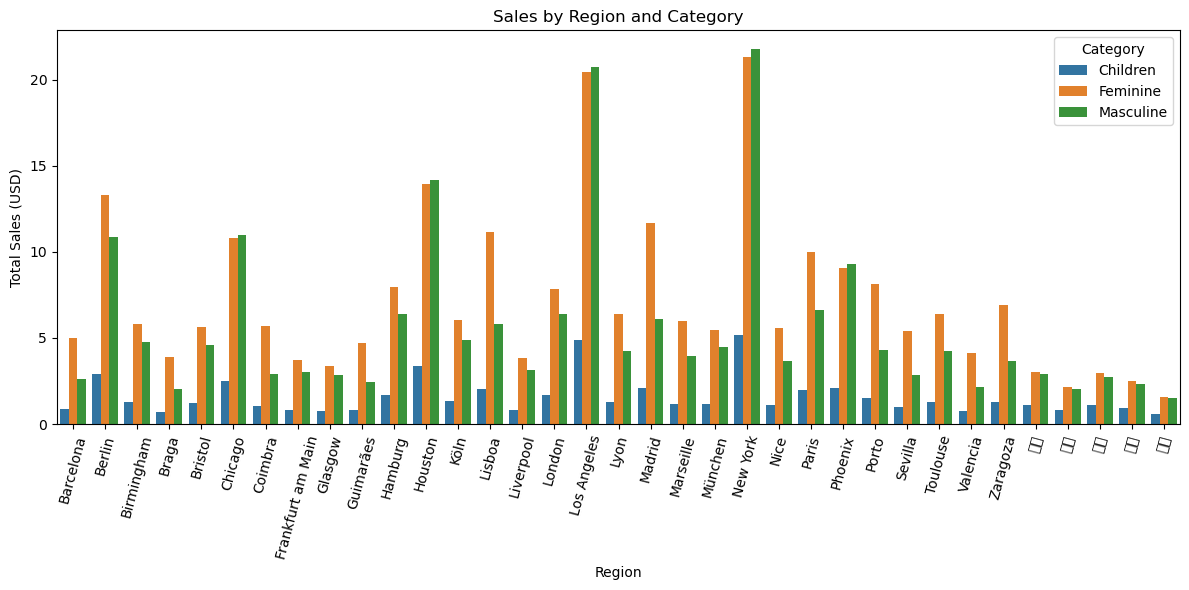

Top Product Categories by Sales:
    Category  Total_invoice_USD
1   Feminine         251.966188
2  Masculine         197.335966
0   Children          55.253884

Impact of Sizes on Sales:
                Sizes  Total_invoice_USD
0         36|38|40|42           1.117037
1      36|38|40|42|44           1.552858
2   36|38|40|42|44|46          23.339868
3         38|40|42|44           1.383463
4      38|40|42|44|46           1.771724
5   38|40|42|44|46|48          23.968696
6              M|L|XL          16.929765
7          M|L|XL|XXL         143.119372
8               P|M|G          34.332969
9            P|M|G|GG          12.218811
10              S|M|L          22.411193
11           S|M|L|XL         193.577344

Sales Distribution by Region and Category:
          City   Category  Total_invoice_USD
0    Barcelona   Children           0.900453
1    Barcelona   Feminine           4.990229
2    Barcelona  Masculine           2.614758
3       Berlin   Children           2.889495
4       Be

In [45]:


category_sales = Total_sales.groupby('Category')['Total_invoice_USD'].sum().reset_index()
category_sales = category_sales.sort_values(by='Total_invoice_USD', ascending=False)


size_sales = Total_sales.groupby('Sizes')['Total_invoice_USD'].sum().reset_index()
color_sales = Total_sales.groupby('Color')['Total_invoice_USD'].sum().reset_index()
region_sales = Total_sales.groupby(['City', 'Category'])['Total_invoice_USD'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='Category', y='Total_invoice_USD', palette='viridis')
plt.title('Popularity of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Visualize Size Impact
plt.figure(figsize=(10, 6))
sns.barplot(data=size_sales, x='Sizes', y='Total_invoice_USD', palette='coolwarm')
plt.title('Impact of Size on Sales')
plt.xlabel('Sizes')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

# Step 5: Visualize Regional Impact on Categories
plt.figure(figsize=(12, 6))
sns.barplot(data=region_sales, x='City', y='Total_invoice_USD', hue='Category', palette='tab10')
plt.title('Sales by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.legend(title='Category')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


print("Top Product Categories by Sales:")
print(category_sales)

print("\nImpact of Sizes on Sales:")
print(size_sales)

print("\nSales Distribution by Region and Category:")
print(region_sales)


# Pricing and Discount Strategies

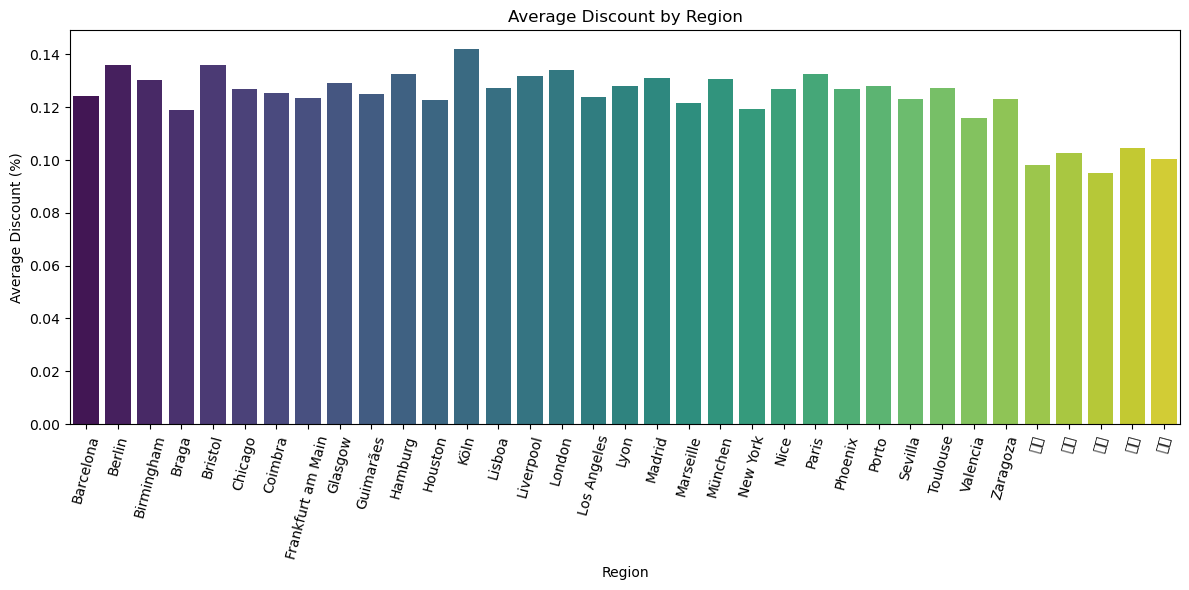

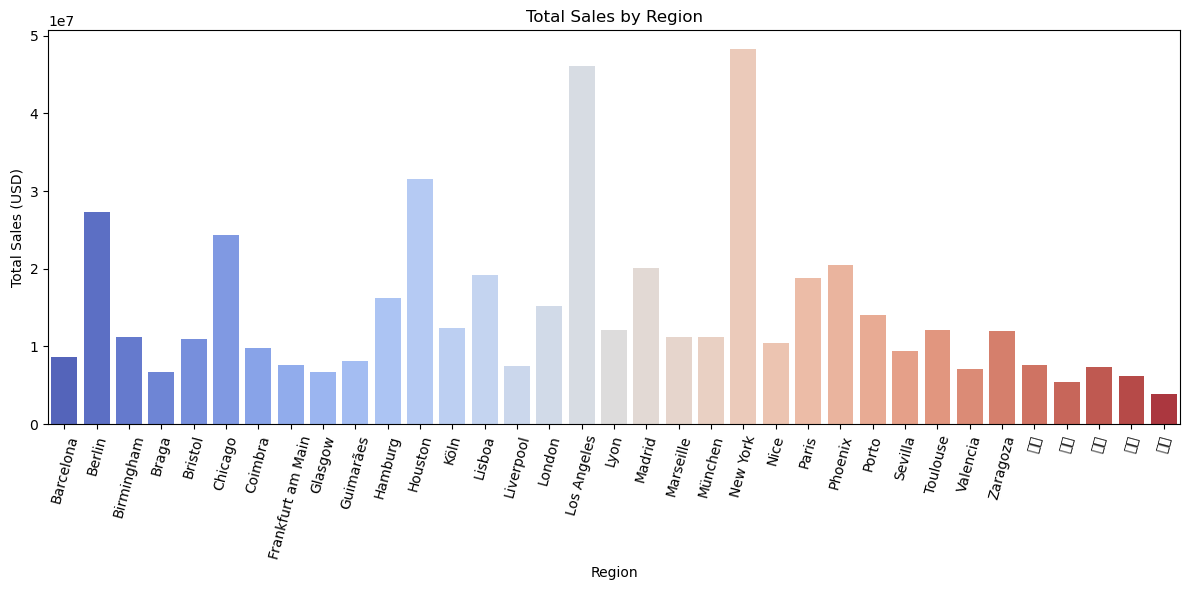

Discount Performance by Region:
                 City  Discount  Sales_in_USD
0           Barcelona  0.124134  8.594510e+06
1              Berlin  0.135880  2.730540e+07
2          Birmingham  0.130454  1.125865e+07
3               Braga  0.118873  6.721404e+06
4             Bristol  0.135868  1.090525e+07
5             Chicago  0.126813  2.428042e+07
6             Coimbra  0.125469  9.786827e+06
7   Frankfurt am Main  0.123566  7.608483e+06
8             Glasgow  0.129348  6.653178e+06
9           Guimarães  0.124929  8.108298e+06
10            Hamburg  0.132451  1.621560e+07
11            Houston  0.122876  3.153635e+07
12               Köln  0.142042  1.235083e+07
13             Lisboa  0.127474  1.925073e+07
14          Liverpool  0.131939  7.451998e+06
15             London  0.134284  1.518546e+07
16        Los Angeles  0.123732  4.606407e+07
17               Lyon  0.127912  1.207217e+07
18             Madrid  0.130936  2.009175e+07
19          Marseille  0.121546  1.124987e+07
20

In [58]:

discount_analysis = Total_sales.groupby('City').agg({
    'Discount': 'mean',  
    'Sales_in_USD': 'sum'           
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=discount_analysis, x='City', y='Discount', palette='viridis')
plt.title('Average Discount by Region')
plt.xlabel('Region')
plt.ylabel('Average Discount (%)')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=discount_analysis, x='City', y='Sales_in_USD', palette='coolwarm')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

print("Discount Performance by Region:")
print(discount_analysis)


# Cross-Country Analysis

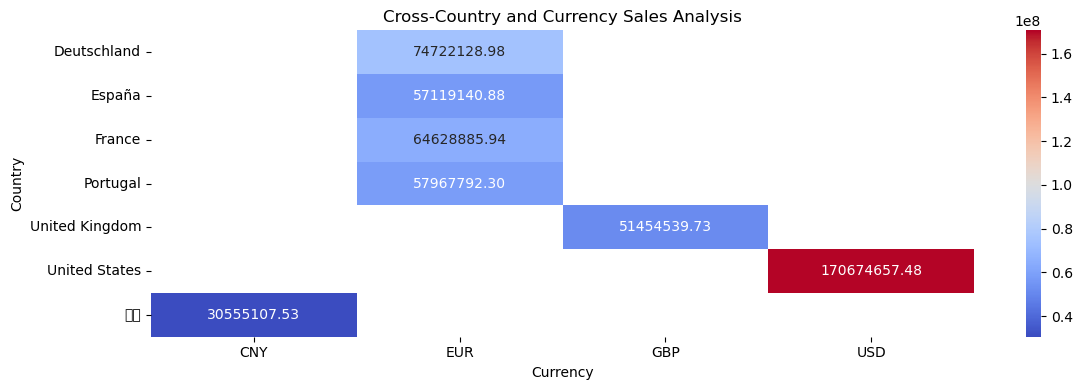

Cross-Country and Currency Sales Data:
          Country Currency  Sales_in_USD
0     Deutschland      EUR  7.472213e+07
1          España      EUR  5.711914e+07
2          France      EUR  6.462889e+07
3        Portugal      EUR  5.796779e+07
4  United Kingdom      GBP  5.145454e+07
5   United States      USD  1.706747e+08
6              中国      CNY  3.055511e+07


In [56]:

country_currency_analysis = Total_sales.groupby(['Country', 'Currency']).agg({
    'Sales_in_USD': 'sum'
}).reset_index()


plt.figure(figsize=(12, 4))
sns.heatmap(pd.pivot_table(country_currency_analysis, values='Sales_in_USD',
                           index='Country', columns='Currency'), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Cross-Country and Currency Sales Analysis')
plt.tight_layout()
plt.show()


print("Cross-Country and Currency Sales Data:")
print(country_currency_analysis)


The United States dominates sales with the highest figure, reaching around ₹170 crores—a clear standout among all the countries.

Deutschland (Germany), France, and España (Spain) follow as strong performers, with sales ranging from ₹57 crores to ₹74 crores.

Portugal has a slightly lower performance but is still competitive, with sales around ₹58 crores.

The United Kingdom contributes moderately with sales close to ₹51 crores.

China's sales stand at a more modest ₹30 crores, being the lowest among the displayed countries.

# 3. Time-Based Trends

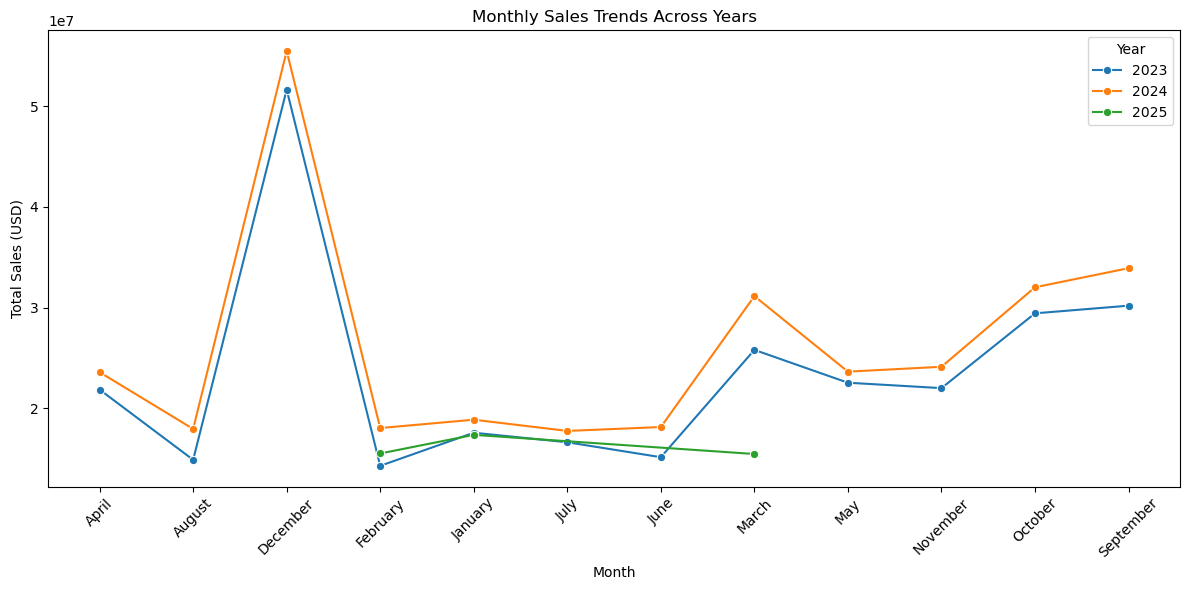

Year-on-Year and Month-on-Month Sales Data:
    Year      Month  Invoice Total
0   2023      April    21868479.00
1   2023     August    14900006.05
2   2023   December    51640576.25
3   2023   February    14304717.35
4   2023    January    17587113.72
5   2023       July    16642942.45
6   2023       June    15160859.00
7   2023      March    25811219.94
8   2023        May    22552166.74
9   2023   November    22014688.40
10  2023    October    29438353.60
11  2023  September    30198918.68
12  2024      April    23598907.00
13  2024     August    17964005.90
14  2024   December    55468207.00
15  2024   February    18053970.40
16  2024    January    18881729.16
17  2024       July    17768038.30
18  2024       June    18152920.50
19  2024      March    31144193.03
20  2024        May    23650944.15
21  2024   November    24134378.30
22  2024    October    32025149.80
23  2024  September    33918646.41
24  2025   February    15528231.05
25  2025    January    17376770.31
26  2025   

In [54]:

Total_sales['Date'] = pd.to_datetime(Total_sales['Date'])
Total_sales['Year'] = Total_sales['Date'].dt.year
Total_sales['Month'] = Total_sales['Date'].dt.month_name()


monthly_sales = Total_sales.groupby(['Year', 'Month'])['Invoice Total'].sum().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Invoice Total', hue='Year', marker='o', palette='tab10')
plt.title('Monthly Sales Trends Across Years')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

print("Year-on-Year and Month-on-Month Sales Data:")
print(monthly_sales)


Sales consistently rise toward the end of the year, particularly in October, November, and December.
 December 2024 stands out with a remarkable peak of over $5 million, the highest among all months.
 Sales in 2025 show a steadier trend with minimal fluctuations compared to previous years.

In [65]:
Total_sales.columns

Index(['Invoice ID', 'Line', 'Customer ID', 'Product ID', 'Unit Price',
       'Quantity', 'Date', 'Discount', 'Line Total', 'Store ID', 'Employee ID',
       'Currency', 'Currency Symbol', 'SKU', 'Transaction Type',
       'Payment Method', 'Invoice Total', 'Month', 'Country', 'City',
       'Store Name', 'Product Name', 'Exchange_Rate', 'Total_invoice_USD',
       'Year', 'Sales_in_USD', 'Category', 'Sizes', 'Color'],
      dtype='object')